In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split

''' Provides an abstraction of a data point as a Euclidean point with (x,y) coordinates. '''
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return '(' + str(self.x) + ',' + str(self.y) + ')'
    
    def __repr__(self):
        return self.__str__()
    
    ''' Returns the point in the given list that is closest (in terms of Euclidean distance) to this point. '''
    def closest_point(self, points):
        shortest_dist = float('inf')
        closest_point = 0
        for point in points:
            dist = math.sqrt((point.x - self.x)**2 + (point.y - self.y)**2)
            if dist < shortest_dist:
                shortest_dist = dist
                closest_point = point
        return closest_point
    
    ''' Returns the point that is closest to the average of the given list of Point objects. '''
    def average_point(self, points):
        avg_x = 0.
        avg_y = 0.
        for point in points:
            avg_x += point.x
            avg_y += point.y
        avg_x /= len(points)
        avg_y /= len(points)

        avgPt = Point2D(avg_x, avg_y)
        closestToAvg = avgPt.closest_point(points)
        return closestToAvg
    
    ''' Creates a scatterplot of the given clusters, color-coding by cluster and highlighting centroids in red. '''
    def plot_clusters(self, points, clusters):
        colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
        centroids = clusters.keys()
        
        for centroid in clusters:
            x, y = [], []
            for point in clusters[centroid]:
                if point != centroid:
                    x.append(point.x)
                    y.append(point.y)
            plt.scatter(x, y, color=colors[centroids.index(centroid) % len(colors)])
            
        x, y = [], []
        for centroid in centroids:
            x.append(centroid.x)
            y.append(centroid.y)
        plt.scatter(x, y, color='red')
        plt.show()

In [ ]:
''' Provides an abstraction of a data point as a Euclidean point with (x,y,z) coordinates. '''
class Point3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def __str__(self):
        return '(' + str(self.x) + ',' + str(self.y) + ',' + str(self.z) + ')'
    
    def __repr__(self):
        return self.__str__()
    
    def closest_point(self, points):
        shortest_dist = float('inf')
        closest_point = 0
        for point in points:
            dist = math.sqrt((point.x - self.x)**2 + (point.y - self.y)**2 + (point.z - self.z)**2)
            if dist < shortest_dist:
                shortest_dist = dist
                closest_point = point
        return closest_point
    
    def average_point(self, points):
        avg_x = 0.
        avg_y = 0.
        avg_z = 0.
        for point in points:
            avg_x += point.x
            avg_y += point.y
            avg_z += point.z
        avg_x /= len(points)
        avg_y /= len(points)
        avg_z /= len(points)
        
        avgPt = Point3D(avg_x, avg_y, avg_z)
        closestToAvg = avgPt.closest_point(points)
        return closestToAvg
    
    ''' Creates a scatterplot of the given clusters, color-coding by cluster and highlighting centroids in red. '''
    def plot_clusters(self, points, clusters):
        colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
        centroids = clusters.keys()
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for centroid in clusters:
            x, y, z = [], [], []
            for point in clusters[centroid]:
                if point != centroid:
                    x.append(point.x)
                    y.append(point.y)
                    z.append(point.z)
            ax.scatter(x, y, z, color=colors[centroids.index(centroid) % len(colors)])
            
        x, y, z = [], [], []
        for centroid in centroids:
            x.append(centroid.x)
            y.append(centroid.y)
            z.append(centroid.z)
        ax.scatter(x, y, z, color='red')
        plt.show()

In [ ]:
''' K medioids centroid initialization. '''
def init_k_medioids(points, k):
    return random.sample(points, k)

In [ ]:
''' Kmeans++ centroid initialization. '''
def init_kpp(points, k):
    # Choose first centroid uniformly at random
    centroids = [random.choice(points)]
    
    # Choose the remaining k-1 centroids
    for i in range(1, k):
        # For each point, calculate the squared distance between it and the closest already-chosen centroid
        distances = [None for j in range(len(points))]
        for j in range(len(points)):
            closest_cent = points[j].closest_point(centroids)
            distances[j] = (closest_cent.x - points[j].x)**2 + (closest_cent.y - points[j].y)**2

        # Generate probability weights proportional to the previously calculated squared distances
        weights = [distances[j] / sum(distances) for j in range(len(distances))]

        # Choose a new centroid randomly from the remaining points 
        centroids.append(np.random.choice(points, p=weights))

    return centroids

In [ ]:
''' Performs the k-means clustering algorithm using the given centroid initialization method. '''
def k_means(centroid_init_func, points, k):
    # Initialize the centroids by randomly choosing k points from the dataset
    centroids = centroid_init_func(points, k)
    previous_centroids = []
    
    # Assign clusters and reassign centroids until they stop changing
    while centroids != previous_centroids:
        previous_centroids = [cent for cent in centroids]
        clusters = {cent: [cent] for cent in centroids}
        
        # Assign each point to the closest centroid
        for point in points:
            if point not in centroids:
                # Find the centroid closest to the point and add it to its cluster
                closest_cent = point.closest_point(centroids)
                clusters[closest_cent].append(point)
                
        # Plot the current clusters
        #points[0].plot_clusters(points, clusters)
                
        # Keep track of the previous set of centroids
        last_centroids = centroids

        # Reassign centroids 
        for centroid in clusters:
            centroids.append(centroid.average_point(clusters[centroid]))    # Assign the new centroid
            centroids.remove(centroid)    # Delete the old centroid
            
    return points, clusters

In [ ]:
''' Creates scatter plots of the two data sets. '''
def plot_datasets(moons, chains):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = [], [], []
    for point in chains:
        x.append(point.x)
        y.append(point.y)
        z.append(point.z)
    ax.scatter(x, y, z)
    plt.title('linked_chains')
    plt.show()

    x, y = [], []
    for point in moons:
        x.append(point.x)
        y.append(point.y)
    plt.scatter(x, y)
    plt.title('two_moons')
    plt.show()

In [ ]:
''' Read the data and separate labels and data '''
two_moons = pd.read_csv('/Users/anthonydepalatis/Documents/School/EE379K/Lab6/data/two_moons.csv', header=None)
linked_chains = pd.read_csv('/Users/anthonydepalatis/Documents/School/EE379K/Lab6/data/linked_chains.csv', header=None)

moons_labels = two_moons[0]
moons_data = np.array(two_moons.drop(0, axis=1))
moons_data = [Point2D(moons_data[k][0], moons_data[k][1]) for k in range(len(moons_data))]

chains_labels = linked_chains[0]
chains_data = np.array(linked_chains.drop(0, axis=1))
chains_data = [Point3D(chains_data[k][0], chains_data[k][1], chains_data[k][2]) for k in range(len(chains_data))]\

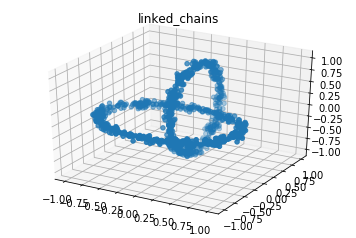

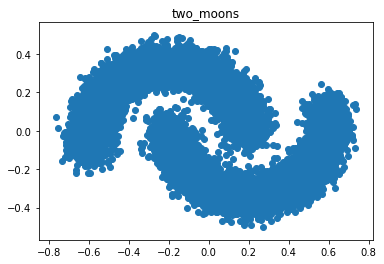

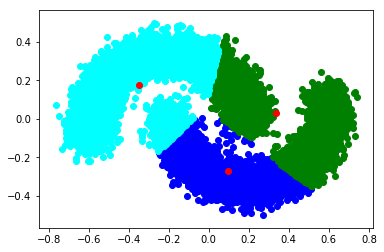

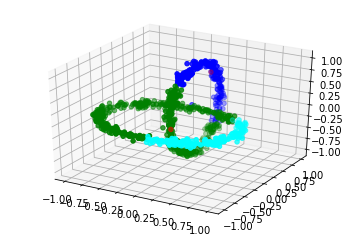

In [103]:
plot_datasets(moons_data, chains_data)

points, clusters = k_means(init_k_medioids, moons_data, 3)
points[0].plot_clusters(points, clusters)

points, clusters = k_means(init_k_medioids, chains_data, 3)
points[0].plot_clusters(points, clusters)